# KNN

## Load dataset

In [2]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn


from collections import defaultdict
from scipy.stats.stats import pearsonr

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
customers = pd.read_csv('/content/drive/MyDrive/DM/Classification/normalized_data_classification_training_tot.csv', sep=',', index_col=0) 

In [4]:
customers_test = pd.read_csv('/content/drive/MyDrive/DM/Classification/normalized_data_classification_test_tot.csv', sep=',', index_col=0) 

In [5]:
customers.describe()

,NumBaskets_mean,DistinticProducts_mean,Qta_mean,Sale_mean,Qta_entropy,Sale_entropy,label
count,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000
mean,0.057735,0.120153,0.207445,0.141933,0.501611,0.734843,1.017517
std,0.117653,0.107006,0.161356,0.120196,0.222969,0.241579,0.725659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.048138,0.091837,0.057230,0.388729,0.628275,0.000000
50%,0.000000,0.092643,0.165816,0.110778,0.544568,0.812482,1.000000
75%,0.070588,0.160763,0.281144,0.196253,0.639243,0.908394,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [6]:
customers.head()

,NumBaskets_mean,DistinticProducts_mean,Qta_mean,Sale_mean,Qta_entropy,Sale_entropy,label
0,0.000000,0.121448,0.321975,0.129797,0.417977,0.894589,2
1,0.000000,0.005450,0.058248,0.002189,0.000000,0.000000,0
2,0.000000,0.354223,0.674745,0.574020,0.562301,0.934952,2
3,0.000000,0.081744,0.248724,0.054193,0.212806,0.623800,1
4,0.264706,0.083106,0.166454,0.169366,0.336874,0.844006,1


In [7]:
x_training = customers[["NumBaskets_mean", "DistinticProducts_mean", "Qta_mean", "Qta_entropy", "Sale_mean", "Sale_entropy"]].to_numpy()
y_training = customers["label"].to_numpy()

In [8]:
x_test = customers_test[["NumBaskets_mean", "DistinticProducts_mean", "Qta_mean", "Qta_entropy", "Sale_mean", "Sale_entropy"]].to_numpy()
y_test = customers_test["label"].to_numpy()

In [9]:
ros = RandomOverSampler(random_state=1234)
x_training_ro, y_training_ro = ros.fit_resample(x_training, y_training)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## GridSearch and Cross Validation setup

In [10]:
grid_params = {
    "n_neighbors": [2, 4, 8, 16, 32, 64, 128, 256],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "chebyshev"]
}

In [11]:
cv = StratifiedKFold(n_splits = 5, random_state = 1234, shuffle=True)

In [12]:
grid_search = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose = 1,
    cv = cv,
    scoring='f1_macro',
    refit=False,
    return_train_score=True
)

In [15]:
grid_search.fit(x_training_ro, y_training_ro)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   33.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1234, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'chebyshev'],
                         'n_neighbors': [2, 4, 8, 16, 32, 64, 128, 256],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=False, return_train_score=True,
             scoring='f1_macro', verbose=1)

In [16]:
print('Best setting parameters ', grid_search.best_params_)
print('Mean and std of this setting ', grid_search.best_score_)

Best setting parameters  {'metric': 'euclidean', 'n_neighbors': 16, 'weights': 'distance'}
Mean and std of this setting  0.9017996665252845


## Minkowski gridsearch

In [17]:
grid_params = {
    "n_neighbors": [2, 4, 8, 16, 32, 64, 128, 256],
    "weights": ["uniform", "distance"],
    "p": [3, 6, 12],
    "metric": ["minkowski"]
}

In [18]:
grid_search = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose = 1,
    cv = cv,
    scoring='f1_macro',
    refit=False,
    return_train_score=True
    )

In [33]:
grid_search.fit(x_training_ro, y_training_ro)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  6.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1234, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['minkowski'],
                         'n_neighbors': [2, 4, 8, 16, 32, 64, 128, 256],
                         'p': [3, 6, 12], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=False, return_train_score=True,
             scoring='f1_macro', verbose=1)

In [34]:
print('Best setting parameters ', grid_search.best_params_)
print('Mean and std of this setting ', grid_search.best_score_)

Best setting parameters  {'metric': 'minkowski', 'n_neighbors': 16, 'p': 3, 'weights': 'distance'}
Mean and std of this setting  0.9000301704824221


## Results evaluation

In [20]:
def evaluate_result(k, metric, p=2):
  i = 0
  y_pred = []
  for train_index, val_index in cv.split(x_training_ro, y_training_ro):
    i += 1
    print("Fold n. %d" % i)
    x_tr, x_val = x_training_ro[train_index], x_training_ro[val_index]
    y_tr, y_val = y_training_ro[train_index], y_training_ro[val_index]
    best_estimator = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric=metric,
                      metric_params=None, n_jobs=None, n_neighbors=k, p=p,
                      weights='distance')
    best_estimator.fit(x_tr, y_tr)
    y_pred.append(best_estimator.score(x_test, y_test))
  import statistics

  print(statistics.mean(y_pred))
  print(statistics.stdev(y_pred))

In [21]:
evaluate_result(16, "euclidean")

Fold n. 1
Fold n. 2
Fold n. 3
Fold n. 4
Fold n. 5
0.8225149700598803
0.007871461904265867


In [22]:
evaluate_result(16, "minkowski", 3)

Fold n. 1
Fold n. 2
Fold n. 3
Fold n. 4
Fold n. 5
0.8179640718562874
0.004061275438997184


In [23]:
evaluate_result(8, "euclidean")

Fold n. 1
Fold n. 2
Fold n. 3
Fold n. 4
Fold n. 5
0.8232335329341317
0.008323137894081005


## Best Model

In [15]:
def plot_confusion_matrix(y_true,y_pred,filename):
  matrix = confusion_matrix(y_true,y_pred,labels = [0,1,2])
  names = ['Low Spend','Medium Spend', 'High Spend']
  row,column = matrix.shape
  values = []
  for i in range(row):
    single_row_values = []
    for j in range(column):
      single_row_values.append(matrix[i,j]/len(y_true))
    values.append(single_row_values)
  df_cm = pd.DataFrame(matrix, index = names, columns = names)
  plt.figure(figsize = (10,7))
  ax = sn.heatmap(df_cm, annot=values,fmt='.4f',cmap='viridis',cbar = False,square = True)
  ax.set_xlabel('Predicted')
  ax.set_ylabel('True')
  ax.xaxis.set_label_position('top') 
  plt.savefig(filename + '.png')

Classification Report [TR]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00      1567
           2       1.00      1.00      1.00       901

    accuracy                           1.00      3311
   macro avg       1.00      1.00      1.00      3311
weighted avg       1.00      1.00      1.00      3311



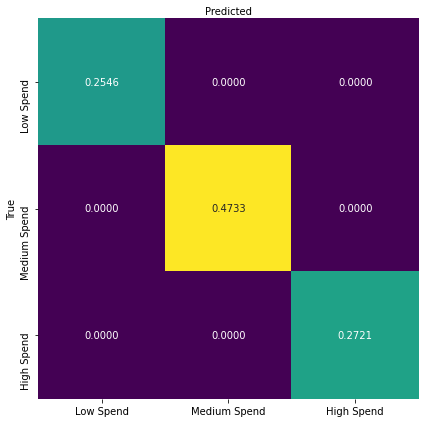

Classification Report [TS]
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       211
           1       0.85      0.77      0.80       392
           2       0.83      0.85      0.84       232

    accuracy                           0.83       835
   macro avg       0.82      0.84      0.83       835
weighted avg       0.83      0.83      0.82       835



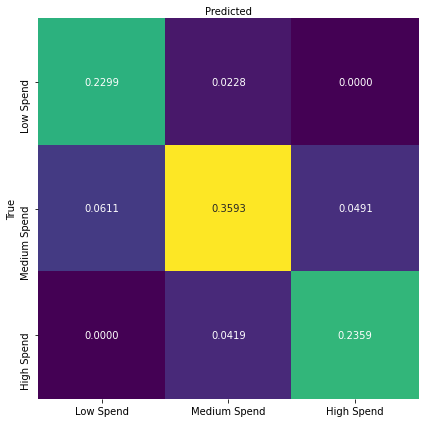

In [16]:
best_estimator = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric="euclidean",
                  metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                  weights='distance')
best_estimator.fit(x_training_ro, y_training_ro)
y_tr_predict = best_estimator.predict(x_training)
y_ts_predict = best_estimator.predict(x_test)
print("Classification Report [TR]")
print(classification_report(y_training, y_tr_predict))
plot_confusion_matrix(y_training, y_tr_predict, "/content/drive/MyDrive/DM/Classification/KNN/confusion_matrix_train")
plt.show() 
print("Classification Report [TS]")
print(classification_report(y_test, y_ts_predict))
plot_confusion_matrix(y_test, y_ts_predict, "/content/drive/MyDrive/DM/Classification/KNN/confusion_matrix_test")
plt.show() 